In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [8]:
from helpers import load_data

# load dataset
x, y = load_data()

In [9]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [57]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train: TODO
    k_indices = k_indices.astype(int)
    k_indices_train = np.array([])
    
    for i in range(k_indices.shape[0]):
        if i != k:
            k_indices_train = np.append(k_indices_train, k_indices[i])
    
    k_indices_test = k_indices[k]
    
    x_train = x[k_indices_train.astype(int)]
    y_train = y[k_indices_train.astype(int)]
    
    x_test = x[k_indices_test.astype(int)]
    y_test = y[k_indices_test.astype(int)]
    
    #print(k_indices_train)
    #print(x_train)
    #print('==================')
    
    # form data with polynomial degree: TODO
    phi_train = build_poly(x_train, degree)
    phi_test = build_poly(x_test, degree)
    
    # ridge regression: TODO
    w = ridge_regression(y_train, phi_train, lambda_)

    # calculate the loss for train and test data: TODO
    loss_tr = np.sqrt(2.0*compute_mse(y_train,phi_train,w))
    loss_te = np.sqrt(2.0*compute_mse(y_test,phi_test,w))
    
    return loss_tr, loss_te

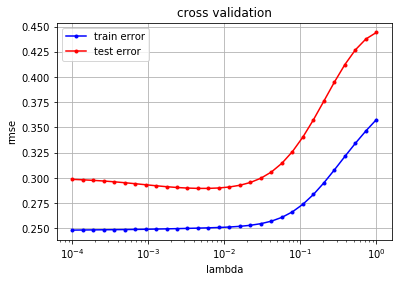

In [59]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)

    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []

    # cross validation: TODO
    for lambda_ in lambdas:
        losses_tr = []
        losses_te = []
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            losses_tr.append(loss_tr)
            losses_te.append(loss_te)
        rmse_tr.append(np.mean(losses_tr))
        rmse_te.append(np.mean(losses_te))
    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

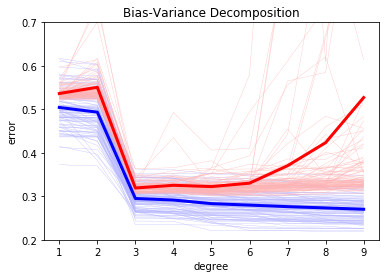

In [64]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        
        # split data with a specific seed: TODO
        x_train, x_test, y_train, y_test = split_data(x, y, ratio_train, seed)

        # bias_variance_decomposition: TODO
        for index_degree, degree in enumerate(degrees):
            phi_train = build_poly(x_train, degree)
            phi_test = build_poly(x_test, degree)
            
            w = least_squares(y_train, phi_train)
            rmse_tr[index_seed, index_degree] = np.sqrt(2.0*compute_mse(y_train,phi_train,w))
            rmse_te[index_seed, index_degree] = np.sqrt(2.0*compute_mse(y_test,phi_test,w))

        
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()